In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('seoul.csv')


data


,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차객수
0,20240701,9호선2~3단계,석촌고분,7665,7414,15079
1,20240701,중앙선,도농,12178,10957,23135
2,20240701,중앙선,구리,14053,14085,28138
3,20240701,4호선,길음,22687,22215,44902
4,20240701,분당선,복정,1,0,1
...,...,...,...,...,...,...
19098,20240731,7호선,신풍,11494,10664,22158
19099,20240731,7호선,대림(구로구청),9328,9366,18694
19100,20240731,7호선,남구로,15284,16072,31356
19101,20240731,7호선,가산디지털단지,47493,47452,94945


In [3]:
data.shape

(19103, 6)

In [4]:
count = data.shape[0]
total_people = data['승하차객수']

stations = set()

for i in range(count):
    stations.add(data.iloc[i]["역명"])

stations

{'4.19민주묘지',
 '가능',
 '가락시장',
 '가산디지털단지',
 '가양',
 '가오리',
 '가좌',
 '가천대',
 '가평',
 '간석',
 '갈매',
 '강남',
 '강남구청',
 '강동',
 '강동구청',
 '강매',
 '강변(동서울터미널)',
 '강일',
 '강촌',
 '개롱',
 '개봉',
 '개포동',
 '개화',
 '개화산',
 '거여',
 '건대입구',
 '검암',
 '경기광주',
 '경마공원',
 '경복궁(정부서울청사)',
 '경찰병원',
 '계양',
 '고덕',
 '고려대(종암)',
 '고색',
 '고속터미널',
 '고잔',
 '곡산',
 '곤지암',
 '공덕',
 '공릉(서울과학기술대)',
 '공항시장',
 '공항화물청사',
 '과천',
 '관악',
 '관악산(서울대)',
 '광나루(장신대)',
 '광명',
 '광명사거리',
 '광운대',
 '광화문(세종문화회관)',
 '광흥창(서강)',
 '교대(법원.검찰청)',
 '구로',
 '구로디지털단지',
 '구룡',
 '구리',
 '구반포',
 '구산',
 '구성',
 '구의(광진구청)',
 '구일',
 '구파발',
 '국수',
 '국회의사당',
 '군자(능동)',
 '군포',
 '굴봉산',
 '굽은다리(강동구민회관앞)',
 '금곡',
 '금릉',
 '금정',
 '금천구청',
 '금촌',
 '금호',
 '기흥',
 '길동',
 '길음',
 '김유정',
 '김포공항',
 '까치산',
 '까치울',
 '낙성대(강감찬)',
 '남구로',
 '남동인더스파크',
 '남부터미널(예술의전당)',
 '남성',
 '남영',
 '남위례',
 '남춘천',
 '남태령',
 '남한산성입구(성남법원.검찰청)',
 '내방',
 '노들',
 '노량진',
 '노원',
 '녹번',
 '녹사평(용산구청)',
 '녹양',
 '녹천',
 '논현',
 '능곡',
 '단대오거리',
 '달월',
 '답십리',
 '당고개',
 '당곡',
 '당산',
 '당정',
 '대곡',
 '대공원',
 '대림(구로구청)',
 '대모산입구',


In [5]:
data2 = data[["역명", "승하차객수"]]
data2

,역명,승하차객수
0,석촌고분,15079
1,도농,23135
2,구리,28138
3,길음,44902
4,복정,1
...,...,...
19098,신풍,22158
19099,대림(구로구청),18694
19100,남구로,31356
19101,가산디지털단지,94945


In [6]:
dict_people_on_station = dict()
for station in stations:
    dict_people_on_station[station] = 0

dict_people_on_station

{'단대오거리': 0,
 '마곡': 0,
 '원덕': 0,
 '인천공항1터미널': 0,
 '도심': 0,
 '수리산': 0,
 '금촌': 0,
 '신대방': 0,
 '청담': 0,
 '상갈': 0,
 '개롱': 0,
 '야당': 0,
 '철산': 0,
 '강남': 0,
 '도원': 0,
 '성남': 0,
 '목동': 0,
 '잠실(송파구청)': 0,
 '중앙': 0,
 '영등포시장': 0,
 '갈매': 0,
 '직산': 0,
 '덕소': 0,
 '총신대입구(이수)': 0,
 '응암': 0,
 '안산': 0,
 '강변(동서울터미널)': 0,
 '원인재': 0,
 '상천': 0,
 '행신': 0,
 '한티': 0,
 '대모산입구': 0,
 '양주': 0,
 '상월곡(한국과학기술연구원)': 0,
 '숭의': 0,
 '구파발': 0,
 '구의(광진구청)': 0,
 '지축': 0,
 '원당': 0,
 '마장': 0,
 '월곡(동덕여대)': 0,
 '신정(은행정)': 0,
 '경마공원': 0,
 '소요산': 0,
 '송탄': 0,
 '수진': 0,
 '연신내': 0,
 '안양': 0,
 '오금': 0,
 '주안': 0,
 '청라국제도시': 0,
 '수원시청': 0,
 '마포': 0,
 '독바위': 0,
 '강남구청': 0,
 '풍산': 0,
 '구반포': 0,
 '안국': 0,
 '정자': 0,
 '장암': 0,
 '정왕': 0,
 '석수': 0,
 '상록수': 0,
 '신촌': 0,
 '세류': 0,
 '녹사평(용산구청)': 0,
 '진위': 0,
 '매교': 0,
 '신내': 0,
 '마포구청': 0,
 '보문': 0,
 '여주': 0,
 '오류동': 0,
 '보라매병원': 0,
 '하남시청(덕풍·신장)': 0,
 '초월': 0,
 '구룡': 0,
 '이촌(국립중앙박물관)': 0,
 '증미': 0,
 '구리': 0,
 '오목천': 0,
 '대성리': 0,
 '중동': 0,
 '홍제': 0,
 '매봉': 0,
 '기흥': 0,
 '어천': 0,
 '용문': 0,
 '신

In [7]:
for i in range(count):
    station = data.iloc[i]["역명"]
    dict_people_on_station[station] = dict_people_on_station[station] + data.iloc[i]["승하차객수"]

dict_people_on_station

{'단대오거리': 688364,
 '마곡': 723251,
 '원덕': 21590,
 '인천공항1터미널': 925825,
 '도심': 127611,
 '수리산': 220590,
 '금촌': 392656,
 '신대방': 1493509,
 '청담': 1143807,
 '상갈': 310985,
 '개롱': 401794,
 '야당': 536515,
 '철산': 1285099,
 '강남': 4889467,
 '도원': 212159,
 '성남': 55192,
 '목동': 1014396,
 '잠실(송파구청)': 5993237,
 '중앙': 1127345,
 '영등포시장': 690855,
 '갈매': 162691,
 '직산': 60554,
 '덕소': 317158,
 '총신대입구(이수)': 1198078,
 '응암': 1042704,
 '안산': 728600,
 '강변(동서울터미널)': 1793365,
 '원인재': 266246,
 '상천': 16928,
 '행신': 478898,
 '한티': 1016312,
 '대모산입구': 348995,
 '양주': 419498,
 '상월곡(한국과학기술연구원)': 360378,
 '숭의': 235058,
 '구파발': 1306488,
 '구의(광진구청)': 1467522,
 '지축': 450239,
 '원당': 635558,
 '마장': 332380,
 '월곡(동덕여대)': 676394,
 '신정(은행정)': 731020,
 '경마공원': 326601,
 '소요산': 115079,
 '송탄': 274569,
 '수진': 324199,
 '연신내': 1999554,
 '안양': 1251017,
 '오금': 592222,
 '주안': 1047353,
 '청라국제도시': 435971,
 '수원시청': 866438,
 '마포': 874864,
 '독바위': 174016,
 '강남구청': 1592988,
 '풍산': 363813,
 '구반포': 75584,
 '안국': 1582724,
 '정자': 1096430,
 '장암': 124144,
 '정

In [8]:
# 1. 각 지하철 역별 평균 이용객 수
print(data2.groupby("역명").mean())

                  승하차객수
역명                     
4.19민주묘지    5755.032258
가능         12045.741935
가락시장       16306.983871
가산디지털단지    57691.306452
가양         42361.161290
...                 ...
회기         46175.354839
회룡         24437.967742
회현(남대문시장)  52288.387097
효창공원앞       9781.467742
흑석(중앙대입구)  16555.290323

[528 rows x 1 columns]


In [9]:
# 2. 각 지하철 역별 이용객 수의 표준 편차


for station in stations:
    count_list = []
    count_list.append(data2[data2["역명"] == station]["승하차객수"])

    print(station, np.std(count_list))

단대오거리 4878.037542962488
마곡 6977.692549496328
원덕 81.22642137664694
인천공항1터미널 1403.3443094196225
도심 833.6369934429664
수리산 1358.9603098800733
금촌 1505.6402000713051
신대방 7461.73188057895
청담 11404.11905494479
상갈 1904.8889343573953
개롱 2814.1602695818196
야당 2532.8141678261545
철산 8848.686169724913
강남 38596.541054254565
도원 2279.3583717547926
성남 305.68671264076835
목동 7744.531993351554
잠실(송파구청) 62587.08929836961
중앙 4872.196275535964
영등포시장 4207.974683693525
갈매 1225.7103629571557
직산 235.34799880411776
덕소 1534.4842015570912
총신대입구(이수) 6939.746176389734
응암 6472.120122681142
안산 1258.1602213390129
강변(동서울터미널) 6828.106169549729
원인재 1264.666774272168
상천 130.22014498628752
행신 2871.2110335479583
한티 4883.197715985162
대모산입구 2644.461483747088
양주 1794.5745370395273
상월곡(한국과학기술연구원) 2514.1205267235737
숭의 1551.796916189323
구파발 7037.0836229757415
구의(광진구청) 10148.320848788138
지축 7585.268863658327
원당 3710.8634308884925
마장 2332.367037118658
월곡(동덕여대) 5147.407760359071
신정(은행정) 5191.870544844361
경마공원 10574.563155381844
소요산 13

In [10]:
# 3. 가장 많은 이용객이 있는 역의 이용객 수
data3 = data2.groupby("역명").sum()
np.max(data3)


5993237

In [11]:
# 4. 가장 적은 이용객이 있는 역의 이용객 수
np.min(data3)

1

In [12]:
# 5. 이용객 수가 가장 많은 역의 이름
data3[data3["승하차객수"] == np.max(data3)].index[0]

'잠실(송파구청)'

In [13]:
# 6. 이용객 수가 가장 적은 역의 이름
data3[data3["승하차객수"] == np.min(data3)].index[0]

'까치울'

array([[<AxesSubplot:title={'center':'승하차객수'}>]], dtype=object)

c:\Users\KDP-2\anaconda3\envs\PY_39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\KDP-2\anaconda3\envs\PY_39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\KDP-2\anaconda3\envs\PY_39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\KDP-2\anaconda3\envs\PY_39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\KDP-2\anaconda3\envs\PY_39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\KDP-2\anaconda3\envs\PY_39\lib\site-packages\matplotlib\backe

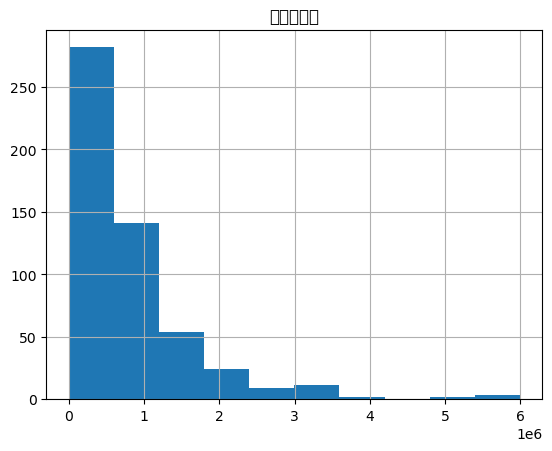

In [42]:
# 7. 이용객 수의 분포를 히스토그램으로 시각화하세요.
station_list = []
people_list = []

for station in stations:
    station_list.append(station)
    people_list.append(data3.loc[station].values[0])

data4 = pd.DataFrame(people_list, station_list, columns = ["승하차객수"])
data4.hist()

승하차객수    774714
Name: 신길, dtype: int64